In [1]:
%matplotlib widget

# %matplotlib ipympl

import pandas as pd
import datetime
import matplotlib.pyplot as plt
import random
from statistics import mean

import util.benchmark as benchmark
import util.plotting as plotting
import util.states.graph as statesgraph
import util.states.plotting as statesplotting

In [2]:
N = 37
ITS = 37
Ns = list(range(1,N+1, int(N/ITS)))

# Algoritmo de busqueda lineal
Tenemos la siguiente implementacion para decidir dada una lista y un elemento, si este elemento pertenece a la lista.

In [3]:
someGraph = statesgraph.StatesGraph()
@statesplotting.trackStatesGraph(someGraph)
def fiboNormal(n,i):
    if n <= 1:
        return n
        
    res = fiboNormal(n-1,i) + fiboNormal(n-2,i)

    return res

print(fiboNormal(20,1))
net = statesplotting.drawTreeGraph(someGraph)
net.show("fibo_no_memo.html")

6765
fibo_no_memo.html


In [4]:
worstCases = [(i,i) for i in Ns]
worstResults = benchmark.benchmarkFuncForCases(1, fiboNormal, worstCases)

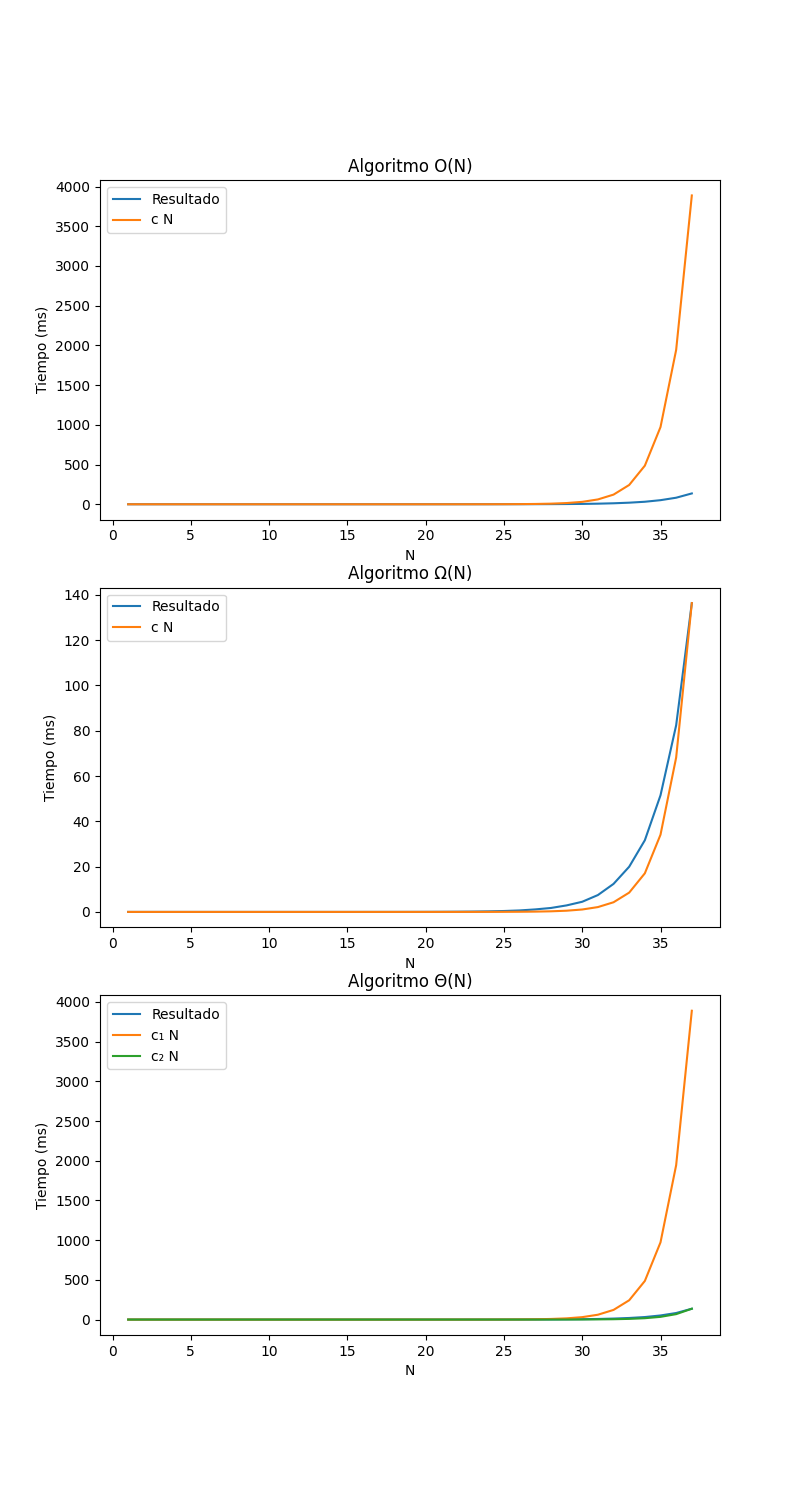

In [5]:
on = lambda n,_: 2**n

plotting.getFuncComplexityAnalysis(Ns, worstCases, worstResults, "N", on, "N", on, "N", on, 20)

In [ ]:
someGraph2 = statesgraph.StatesGraph()
memo = dict()
@statesplotting.trackStatesGraph(someGraph2)
def fiboMemo(n):
    if n <= 1:
        return n

    if n in memo:
        return memo[n]
    
    res = fiboMemo(n-1) + fiboMemo(n-2)

    memo[n] = res

    return res

print(fiboMemo(20))
net = statesplotting.drawTreeGraph(someGraph2)
net.show("fibo_with_memo.html")